In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import h5py
import numpy as np
import os
import pandas as pd

In [2]:
image_list_g = sorted(os.listdir("../../data/HSC/HSC_v6/image_renamed/g_band"))
image_list_r = sorted(os.listdir("../../data/HSC/HSC_v6/image_renamed/r_band"))
image_list_i = sorted(os.listdir("../../data/HSC/HSC_v6/image_renamed/i_band"))
image_list_z = sorted(os.listdir("../../data/HSC/HSC_v6/image_renamed/z_band"))
image_list_y = sorted(os.listdir("../../data/HSC/HSC_v6/image_renamed/y_band"))

In [3]:
photozdata = pd.read_csv('/mnt/data/HSC/HSC_v6/HSC_v6.csv')

127x127

In [25]:
hf = h5py.File('../../data/HSC/HSC_v6/five_band_image127x127.hdf5', 'r')

In [26]:
for i in range(len(image_list_g)):

    object_id = image_list_g[i][0:17]

    five_band_image = []

    image_g = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/"+image_list_g[i])
    image_r = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/"+image_list_r[i])
    image_i = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/"+image_list_i[i])
    image_z = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/"+image_list_z[i])
    image_y = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/"+image_list_y[i])

    image_g_data = image_g[1].data
    image_r_data = image_r[1].data
    image_i_data = image_i[1].data
    image_z_data = image_z[1].data
    image_y_data = image_y[1].data

    pad1 = int((127-len(image_g_data))/2)
    pad2 = 127-len(image_g_data)-pad1
    pad3 = int((127-len(image_g_data[0]))/2)
    pad4 = 127-len(image_g_data[0])-pad3


    im_g = np.pad(image_g_data,((pad1,pad2),(pad3,pad4)),"constant",constant_values = ((0,0),(0,0)))
    im_r = np.pad(image_r_data,((pad1,pad2),(pad3,pad4)),"constant",constant_values = ((0,0),(0,0)))
    im_i = np.pad(image_i_data,((pad1,pad2),(pad3,pad4)),"constant",constant_values = ((0,0),(0,0)))
    im_z = np.pad(image_z_data,((pad1,pad2),(pad3,pad4)),"constant",constant_values = ((0,0),(0,0)))
    im_y = np.pad(image_y_data,((pad1,pad2),(pad3,pad4)),"constant",constant_values = ((0,0),(0,0)))

    five_band_image.append(im_g)
    five_band_image.append(im_r)
    five_band_image.append(im_i)
    five_band_image.append(im_z)
    five_band_image.append(im_y)

    five_band_image_reshape = np.reshape(np.array(five_band_image),[1,5,127,127])

    filt = photozdata["object_id"] == int(object_id)
    photozdata_subset = photozdata[filt]
    
    specz = np.array(photozdata_subset["specz_redshift"])[0]
    specz_reshape = np.reshape(specz,[1,1])

    if i == 0:
        hf.create_dataset("image",data = five_band_image_reshape,chunks = True,maxshape = (None,5,127,127))
        hf.create_dataset("specz",data = specz_reshape,chunks = True,maxshape = (None,1))

    else:
        hf['image'].resize((hf['image'].shape[0]+1), axis=0)
        hf['image'][hf["image"].shape[0]-1,:,:,:] = five_band_image

        hf['specz'].resize((hf['specz'].shape[0]+1), axis=0)
        hf['specz'][hf["specz"].shape[0]-1,:] = specz


    image_g.close()
    image_r.close()
    image_i.close()
    image_z.close()
    image_y.close()
    

120x120

In [83]:
hf = h5py.File('../../data/HSC/HSC_v6/five_band_image64x64.hdf5', 'r')

In [84]:
for i in range(len(image_list_g)):

    object_id = image_list_g[i][0:17]

    five_band_image = []

    image_g = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/"+image_list_g[i])
    image_r = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/"+image_list_r[i])
    image_i = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/"+image_list_i[i])
    image_z = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/"+image_list_z[i])
    image_y = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/"+image_list_y[i])

    image_g_data = image_g[1].data
    image_r_data = image_r[1].data
    image_i_data = image_i[1].data
    image_z_data = image_z[1].data
    image_y_data = image_y[1].data

    pad1 = int((127-len(image_g_data))/2)
    pad2 = 127-len(image_g_data)-pad1
    pad3 = int((127-len(image_g_data[0]))/2)
    pad4 = 127-len(image_g_data[0])-pad3

    im_g = np.pad(image_g_data,((pad1,pad2),(pad3,pad4)),"constant",constant_values = ((0,0),(0,0)))
    im_r = np.pad(image_r_data,((pad1,pad2),(pad3,pad4)),"constant",constant_values = ((0,0),(0,0)))
    im_i = np.pad(image_i_data,((pad1,pad2),(pad3,pad4)),"constant",constant_values = ((0,0),(0,0)))
    im_z = np.pad(image_z_data,((pad1,pad2),(pad3,pad4)),"constant",constant_values = ((0,0),(0,0)))
    im_y = np.pad(image_y_data,((pad1,pad2),(pad3,pad4)),"constant",constant_values = ((0,0),(0,0)))
    
    im_g = im_g[31:95,31:95]
    im_r = im_r[31:95,31:95]
    im_i = im_i[31:95,31:95]
    im_z = im_z[31:95,31:95]
    im_y = im_y[31:95,31:95]


    five_band_image.append(im_g)
    five_band_image.append(im_r)
    five_band_image.append(im_i)
    five_band_image.append(im_z)
    five_band_image.append(im_y)

    five_band_image_reshape = np.reshape(np.array(five_band_image),[1,5,64,64])

    filt = photozdata["object_id"] == int(object_id)
    photozdata_subset = photozdata[filt]
    
    specz = np.array(photozdata_subset["specz_redshift"])[0]
    specz_reshape = np.reshape(specz,[1,1])

    if i == 0:
        hf.create_dataset("image",data = five_band_image_reshape,chunks = True,maxshape = (None,5,64,64))
        hf.create_dataset("specz",data = specz_reshape,chunks = True,maxshape = (None,1))

    else:
        hf['image'].resize((hf['image'].shape[0]+1), axis=0)
        hf['image'][hf["image"].shape[0]-1,:,:,:] = five_band_image

        hf['specz'].resize((hf['specz'].shape[0]+1), axis=0)
        hf['specz'][hf["specz"].shape[0]-1,:] = specz


    image_g.close()
    image_r.close()
    image_i.close()
    image_z.close()
    image_y.close()

In [86]:
hf = h5py.File('../../data/HSC/HSC_v6/five_band_image64x64.hdf5', 'r')

In [87]:
hf["specz"]

<HDF5 dataset "specz": shape (286401, 1), type "<f8">

In [88]:
hf["image"]

<HDF5 dataset "image": shape (286401, 5, 64, 64), type "<f4">

In [65]:
image_g = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/"+image_list_g[0])
image_g_data = image_g[1].data


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

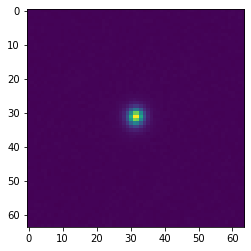

In [89]:
plt.imshow(hf["image"][0,0,:,:])

In [90]:
hf.close()

In [374]:
image_g = fits.open("../../data/HSC/HSC_v6/image_renamed/g_band/36407054788744371.fits")
image_g_data = image_g[1].data
im = image_g_data[0:120,0:120]
len(im[0])

120